In [1]:
import numpy as np
import h5py
from IPython.display import Image

import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 200
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize': 'x-large',
         'xtick.labelsize': 'large',
         'ytick.labelsize': 'large'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '/home/ksf293/anomalies-GAN-HSC/analysis')
import plotter
import utils

In [2]:
base_dir = '/scratch/ksf293/anomalies'
#plot_dir = '/home/ksf293/anomalies-GAN-HSC/plots/plots_2021-02-14'
plot_dir = '/home/ksf293/anomalies-GAN-HSC/papers/paper_main/images'

In [3]:
imtag = 'gri'
tag = 'gri_lambda0.3'
imarr_fn = f'{base_dir}/data/images_h5/images_{imtag}.h5'
imarr = h5py.File(imarr_fn, 'r')
results_fn = f'{base_dir}/results/results_{tag}.h5'
res = h5py.File(results_fn, 'r')

In [4]:
gen_scores = res['gen_scores_sigma'][:]
disc_scores = res['disc_scores_sigma'][:]
scores = res['anomaly_scores_sigma'][:]
idxs = res['idxs'][:]
print(len(idxs))

942781


## Effect of s_gen and s_disc

In [17]:
nrows = 4
ncols = 4
nplot = nrows*ncols

11893


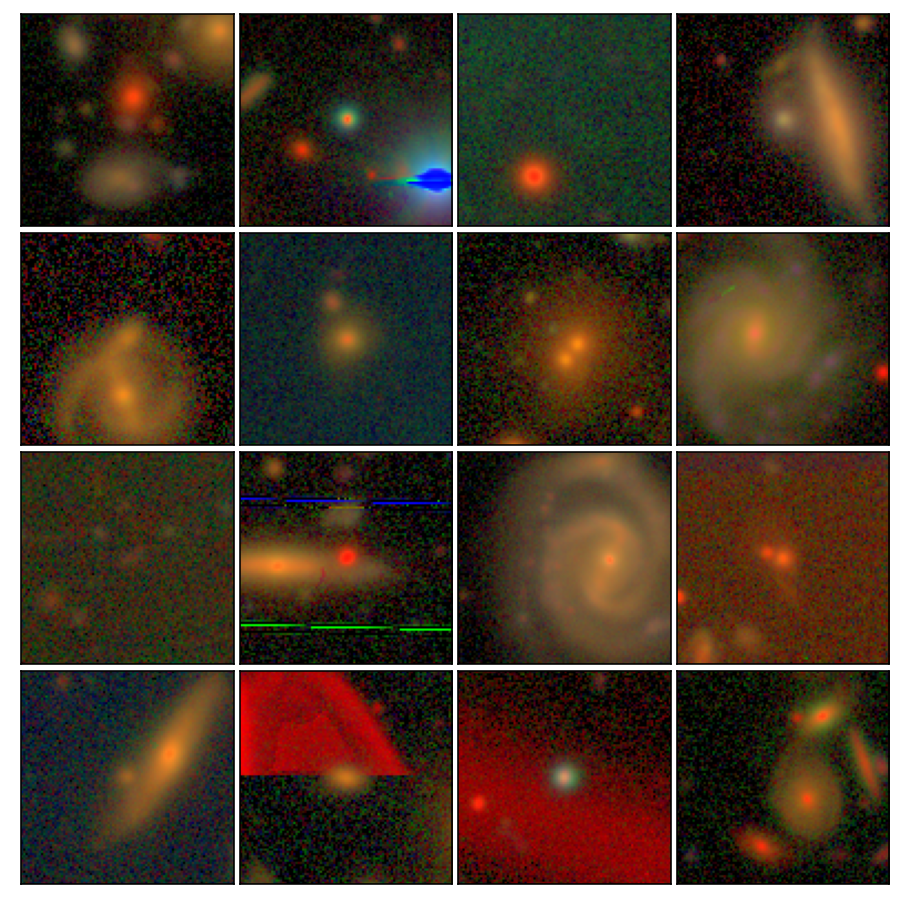

In [60]:
locs = np.where((disc_scores > gen_scores) & (disc_scores > 3))[0]
idxs_sub = [idxs[loc] for loc in locs]
print(len(idxs_sub))
np.random.seed(8) #18, 21, 7, 8
idxs_sub = np.random.choice(idxs_sub, nplot, replace=False)
saveto = f'{plot_dir}/score_effect_3sigdisc_discgreater.png'
plotter.plot_ims(idxs_sub, nrows, ncols, tight=True, hspace=0.032, wspace=-0.08, saveto=saveto)

1584


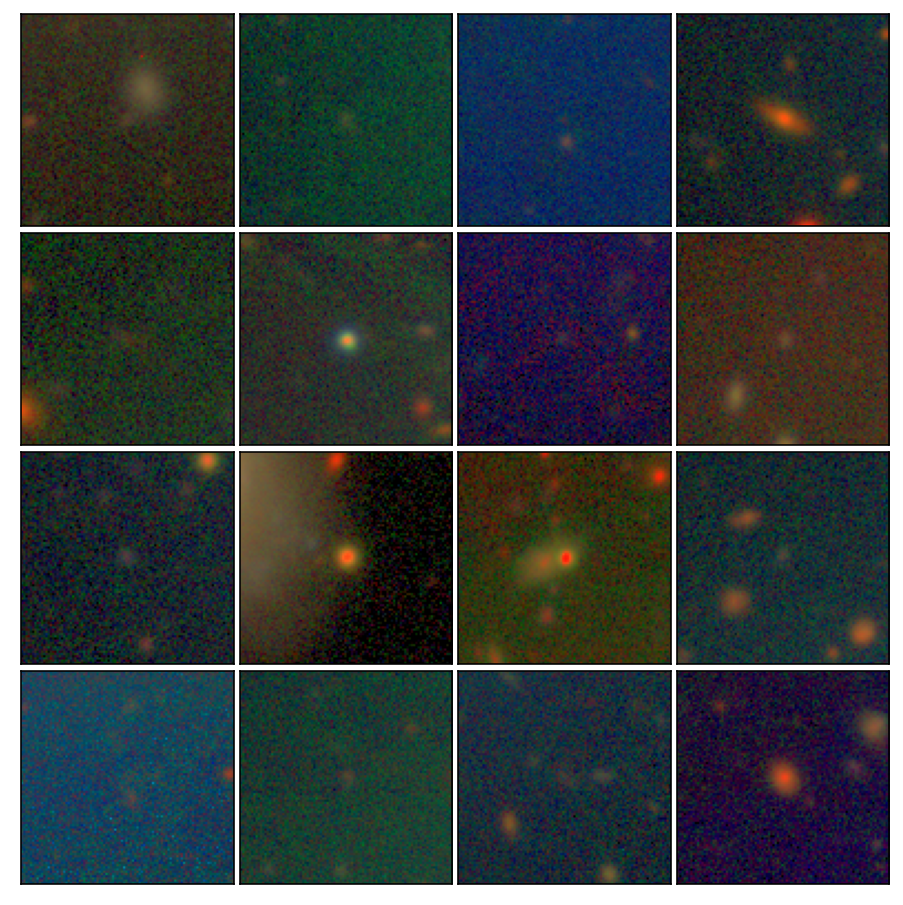

In [61]:
locs = np.where((disc_scores < gen_scores) & (disc_scores > 3))[0]
idxs_sub = [idxs[loc] for loc in locs]
print(len(idxs_sub))
np.random.seed(8)
idxs_sub = np.random.choice(idxs_sub, nplot, replace=False)
saveto = f'{plot_dir}/score_effect_3sigdisc_gengreater.png'
plotter.plot_ims(idxs_sub, nrows, ncols, tight=True, hspace=0.032, wspace=-0.08, saveto=saveto)

3285


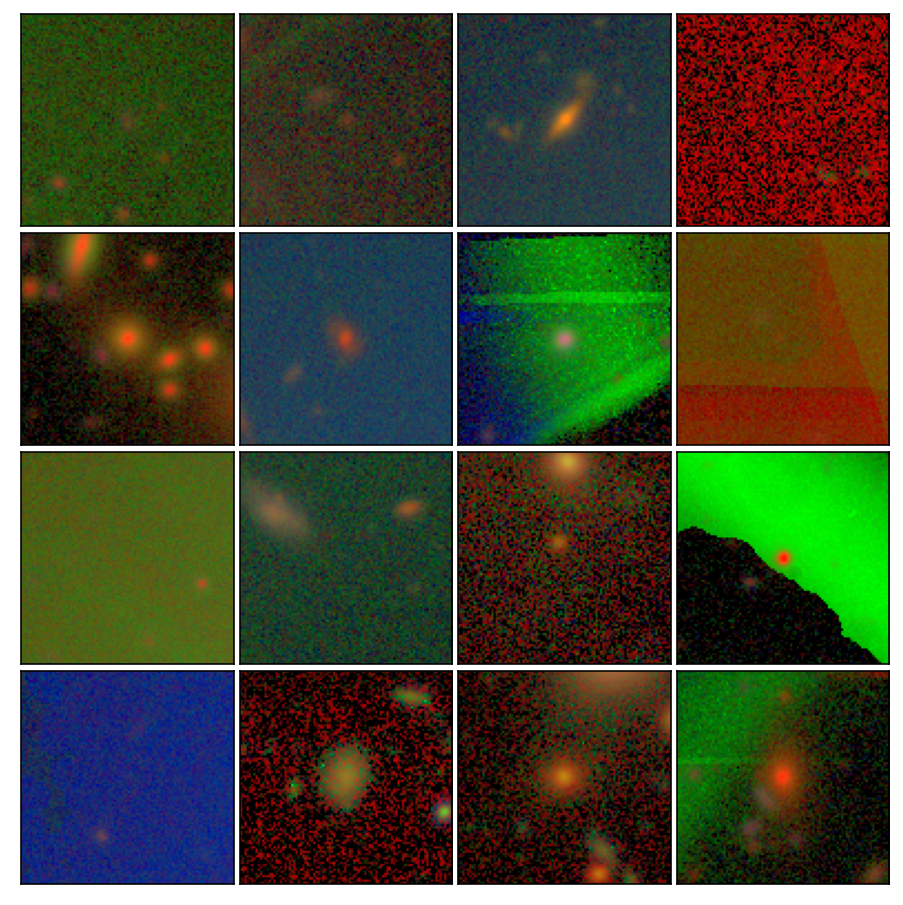

In [62]:
locs = np.where((disc_scores > gen_scores) & (gen_scores > 3))[0]
idxs_sub = [idxs[loc] for loc in locs]
print(len(idxs_sub))
np.random.seed(8)
idxs_sub = np.random.choice(idxs_sub, nplot, replace=False)
saveto = f'{plot_dir}/score_effect_3siggen_discgreater.png'
plotter.plot_ims(idxs_sub, nrows, ncols, tight=True, hspace=0.032, wspace=-0.08, saveto=saveto)

8243


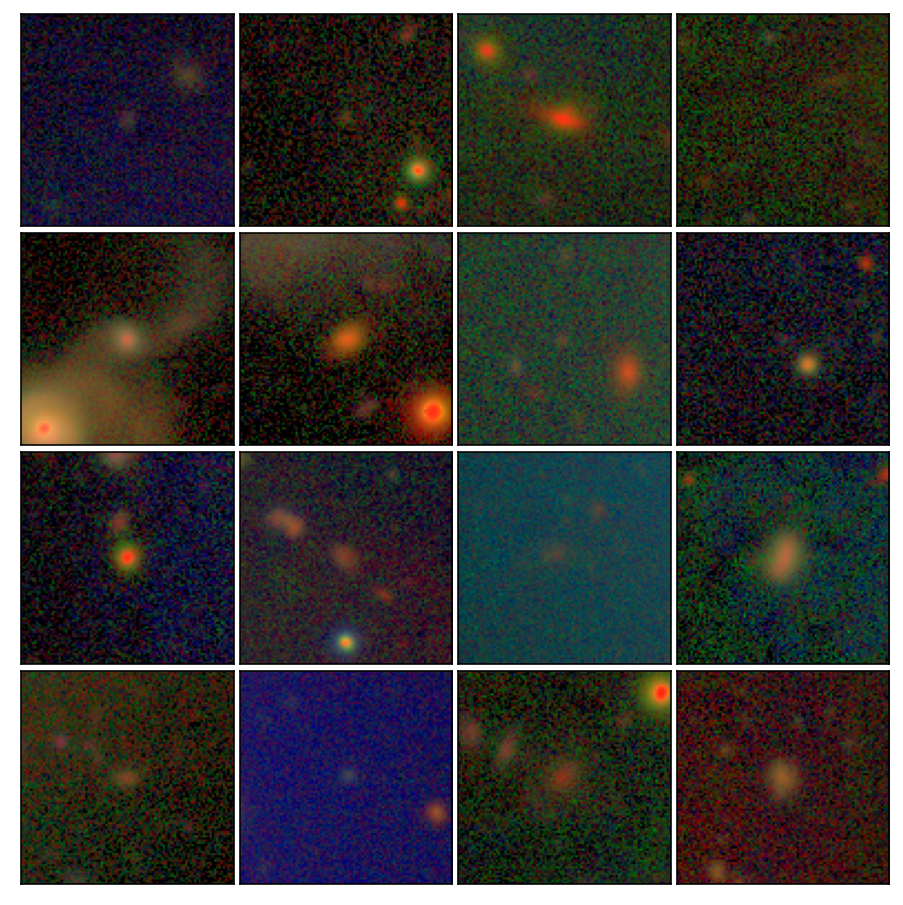

In [63]:
locs = np.where((disc_scores < gen_scores) & (gen_scores > 3))[0]
idxs_sub = [idxs[loc] for loc in locs]
print(len(idxs_sub))
np.random.seed(8)
idxs_sub = np.random.choice(idxs_sub, nplot, replace=False)
saveto = f'{plot_dir}/score_effect_3siggen_gengreater.png'
plotter.plot_ims(idxs_sub, nrows, ncols, tight=True, hspace=0.032, wspace=-0.08, saveto=saveto)

## Score distribution

-4.68004 25.4914 -1.0076863e-06 1.0
-2.290271 35.175587 1.5472738e-08 0.9999999


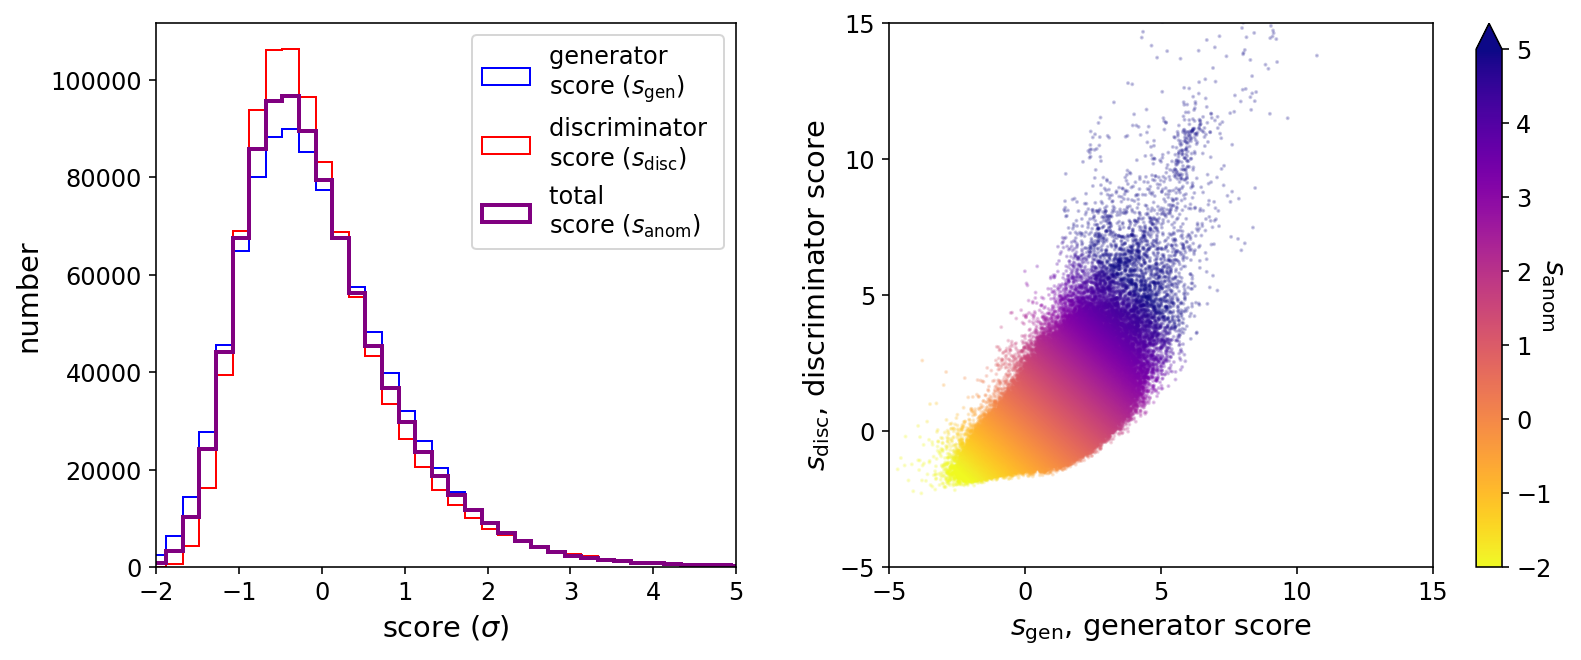

In [41]:
saveto = f'{plot_dir}/score_distribution.png'
plotter.plot_anomaly_dist(gen_scores, disc_scores, scores, saveto=saveto)

## UMAPs

### 100k

### 3sigdisc

In [5]:
embed_dir = f"{base_dir}/results/embeddings"

tag_u = 'gri_10k_lambda0.3'
umap_tag = '_nn5md0.1'
#auto_tag = '_model29500_latent16'
auto_tag = '_model16000_latent64'

results_fn_u = f'{base_dir}/results/results_{tag_u}.h5'
res_u = h5py.File(results_fn_u, 'r')
scores_u = res_u['disc_scores_sigma']

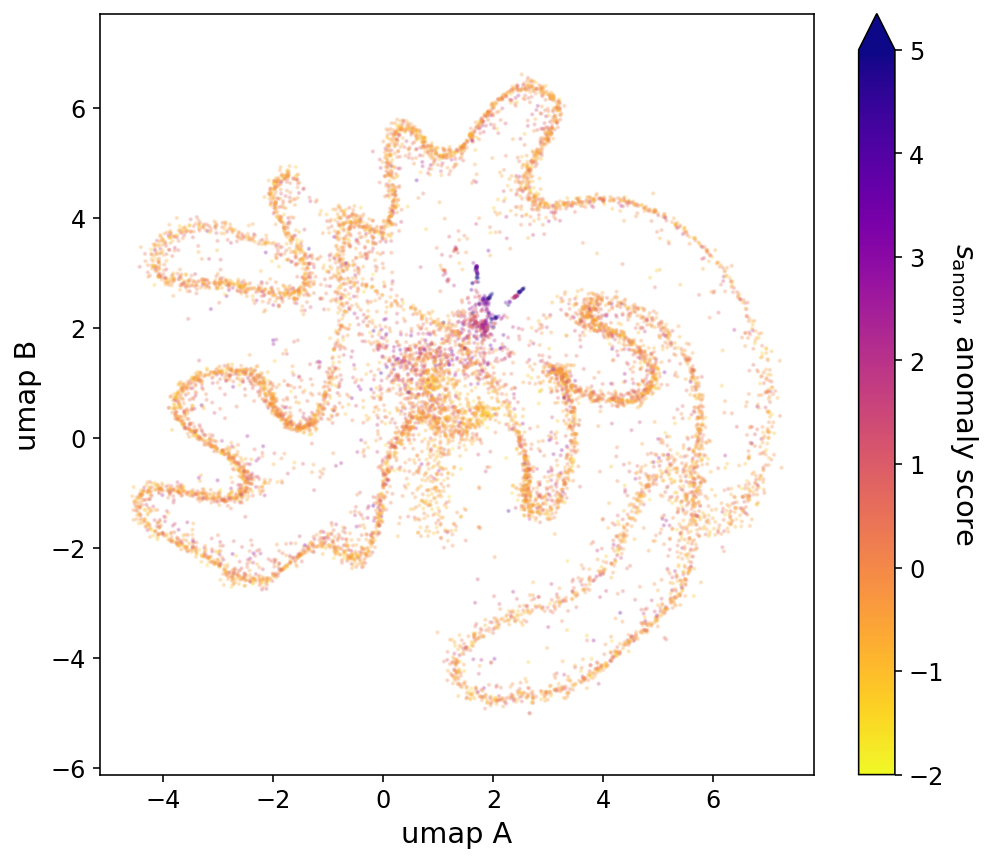

In [14]:
embedding = np.load(f"{embed_dir}/embedding_umap_residuals_{tag_u}{umap_tag}.npy")
#saveto = f'{plot_dir}/umap_{tag_u}_residuals.png'
saveto = None
plotter.plot_umap(embedding, colorby=scores_u, vmin=-2, vmax=5, saveto=saveto)